Total sum for Duration: 1.092503552
Operations sorted by total duration for Duration:
Operation: matmul, dtype:F32, Duration: 0.44670156800000005, Count: 14026 Perc:40.89%
Operation: binary op:Mult, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.17464016000000002, Count: 12240 Perc:15.99%
Operation: copy2d dtype:F32, Duration: 0.135288864, Count: 12216 Perc:12.38%
Operation: binary op:Add, dtype:F32, pipeline:BinaryBufferFromBufferContiguousBoth, Duration: 0.05655244799999999, Count: 6120 Perc:5.18%
Operation: rms_norm, dtype:F32, Duration: 0.040216576000000004, Count: 3315 Perc:3.68%
Operation: copy strided dtype:F32, Duration: 0.039672832, Count: 3048 Perc:3.63%
Operation: unary op:Affine, dtype:F32, pipeline:UnaryFromBufferContiguous, Duration: 0.029572095999999996, Count: 3060 Perc:2.71%
Operation: unary op:Exp, dtype:F32, pipeline:UnaryFromBufferContiguous, Duration: 0.028750816000000002, Count: 3060 Perc:2.63%
Operation: binary op:Minus, dtype:F32, pipeline:BinaryBufferF

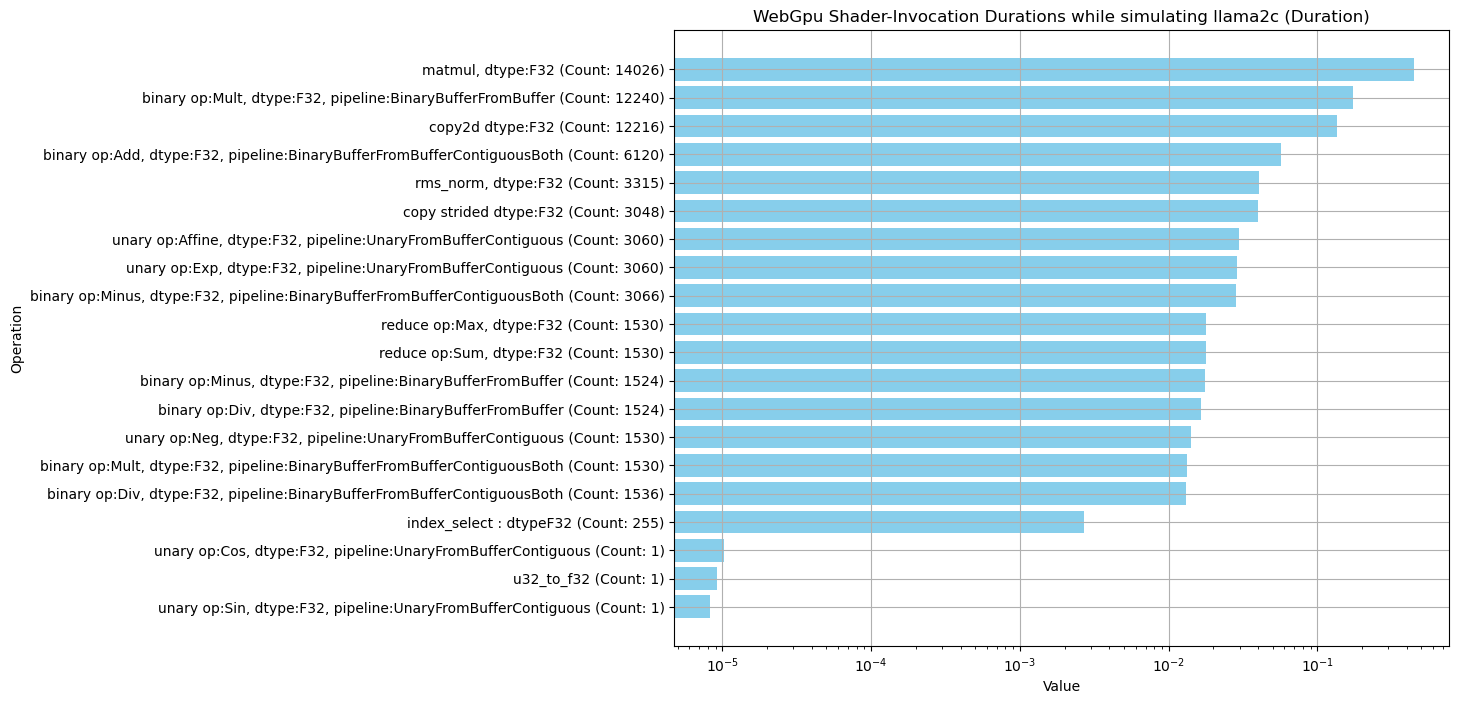

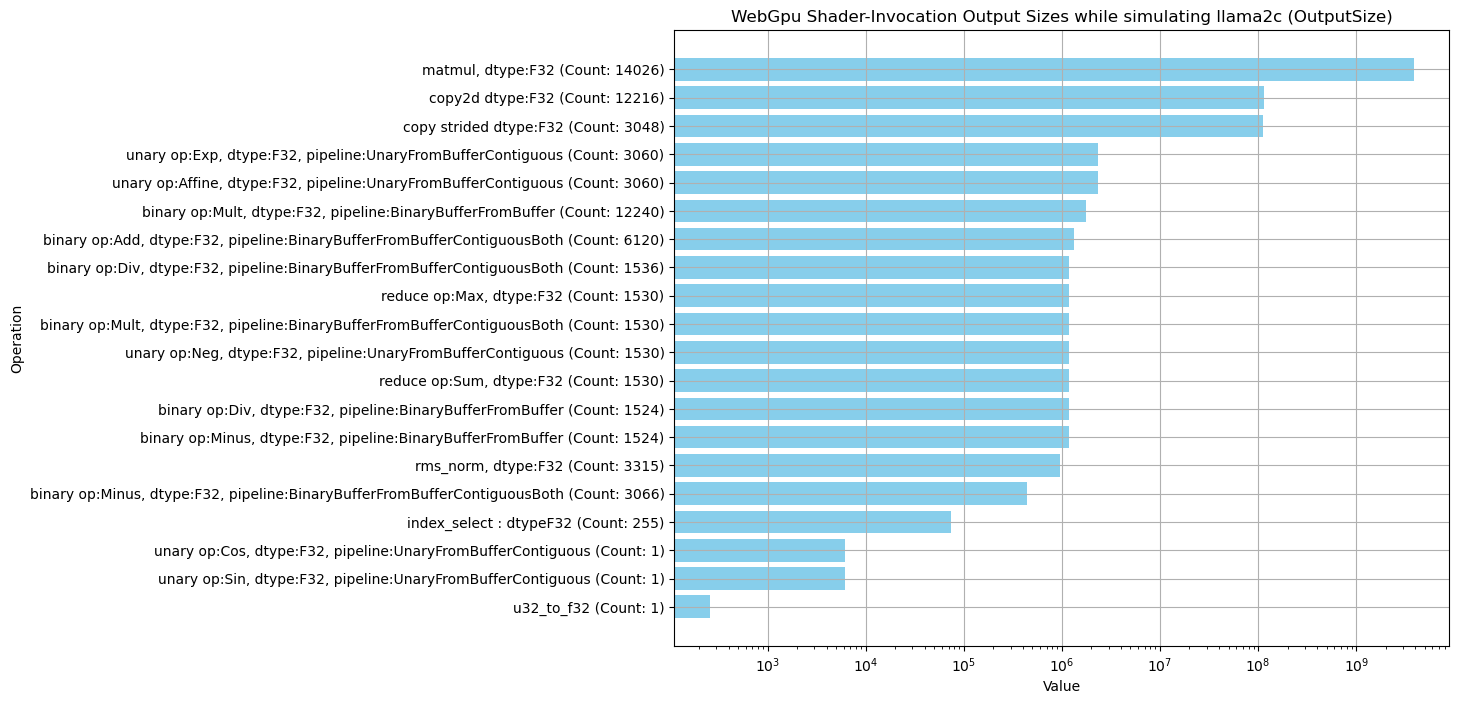

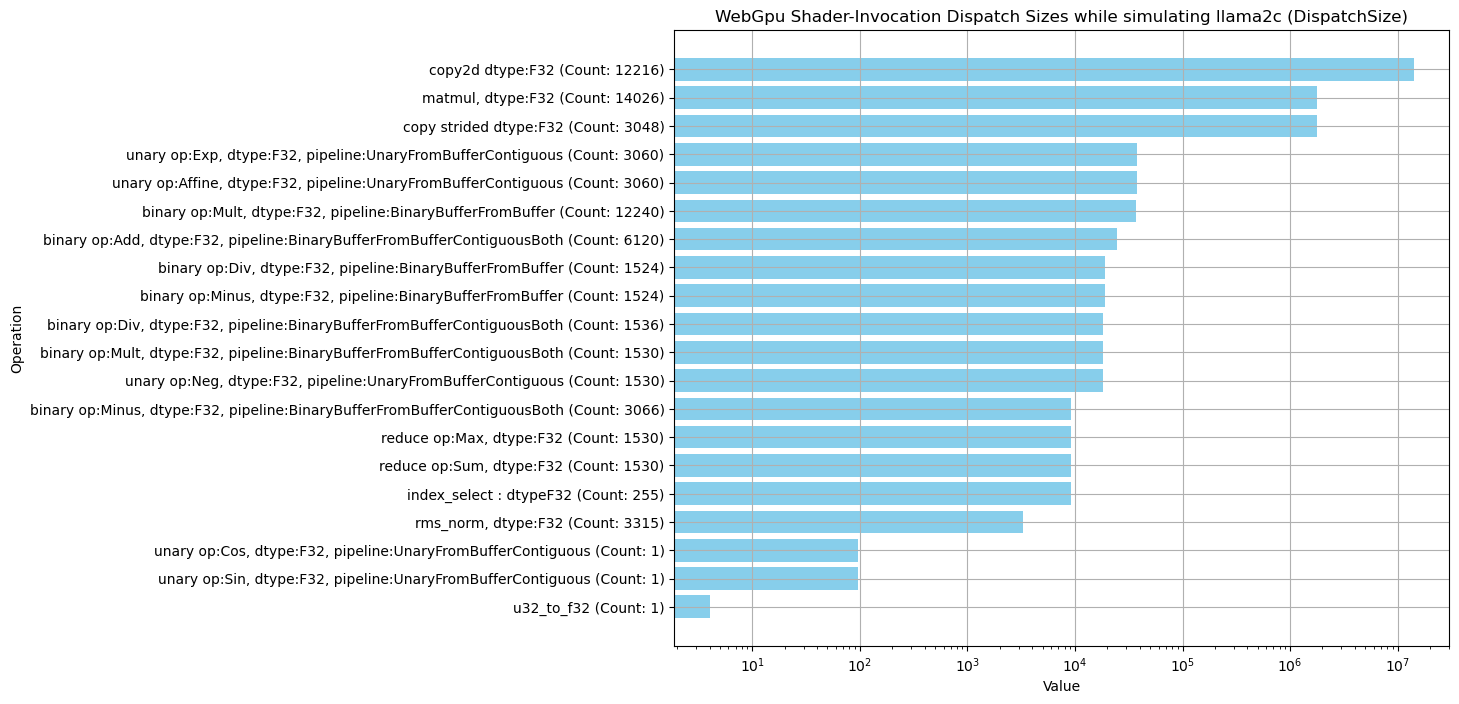

In [23]:
import json
import matplotlib.pyplot as plt

# Load JSON data from a file
with open('candle-examples\wgpu_infollama2-c_small.json', 'r') as file:
    data = json.load(file)

 
# Separate the data by measurement type
duration_data = [op for op in data if op['m_type'] == 'Duration']
output_size_data = [op for op in data if op['m_type'] == 'OutputSize']
dispatch_size_data = [op for op in data if op['m_type'] == 'DispatchSize']

# Function to process data for plotting
def process_data(data):
    for operation in data:
        operation['value'] = operation['count'] * operation['mean']
    
    sorted_operations = sorted(data, key=lambda x: x['value'], reverse=True)
    
    labels = [f"{op['label']} (Count: {op['count']})" for op in sorted_operations]
    values = [op['value'] for op in sorted_operations]
    total_sum = sum(values)
    
    # Print the operations along with their values
    print(f"Total sum for {data[0]['m_type']}: {total_sum}")
    print(f"Operations sorted by total {data[0]['m_type'].lower()} for {data[0]['m_type']}:")
    for operation in sorted_operations:
        print(f"Operation: {operation['label']}, {data[0]['m_type']}: {operation['value']}, Count: {operation['count']} Perc:{operation['value']/total_sum:.2%}")
    
    return labels, values

# Process data for each measurement type
duration_labels, duration_values = process_data(duration_data)
output_size_labels, output_size_values = process_data(output_size_data)
dispatch_size_labels, dispatch_size_values = process_data(dispatch_size_data)

# Function to plot data
def plot_data(labels, values, title):
    plt.figure(figsize=(10, 8))
    plt.barh(labels, values, color='skyblue')
    plt.grid()
    plt.xscale('log')
    plt.xlabel('Value')
    plt.ylabel('Operation')
    plt.title(title)
    plt.gca().invert_yaxis()  # To have the longest value at the top
    plt.show()

# Plot data for each measurement type
plot_data(duration_labels, duration_values, 'WebGpu Shader-Invocation Durations while simulating llama2c (Duration)')
plot_data(output_size_labels, output_size_values, 'WebGpu Shader-Invocation Output Sizes while simulating llama2c (OutputSize)')
plot_data(dispatch_size_labels, dispatch_size_values, 'WebGpu Shader-Invocation Dispatch Sizes while simulating llama2c (DispatchSize)')

In [ ]:
import json
import matplotlib.pyplot as plt

# Load JSON data from a file
with open('candle-examples\wgpu_infostable_defusion_small.json', 'r') as file:
    data = json.load(file)

    # Add a new key for duration to each operation
for operation in data:
    operation['duration'] = operation['count'] * operation['mean']

# Sort the list of operations by duration in descending order
sorted_operations = sorted(data, key=lambda x: x['duration'], reverse=True)


# Extract labels and durations for plotting
labels = [f"{op['label']} (Count: {op['count']})" for op in sorted_operations]
#labels = [op['label'] for op in sorted_operations]
durations = [op['duration'] for op in sorted_operations]
total_sum = sum(durations)
print(f"total_sum: {sum(durations)}")

# Print the operations along with their durations
print("Operations sorted by execution time (duration):")
for operation in sorted_operations:
    print(f"Operation: {operation['label']}, Duration: {operation['duration']}, Count: {operation['count']} Perc:{operation['duration']/total_sum}")


# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(labels, durations, color='skyblue')
plt.grid()
plt.xscale('log')
plt.xlabel('Duration [s]')
plt.ylabel('Operation')
plt.title('WebGpu Shader-Invocation Durations while simulating llama2c')
plt.gca().invert_yaxis()  # To have the longest duration at the top
plt.show()


Total sum for Duration: 16.986184704000006
Operations sorted by total duration for Duration:
Operation: matmul, dtype:F32, Duration: 13.003209728000002, Count: 440 Perc:76.55%
Operation: conv2d, dtype:F32, Duration: 3.7078835199999998, Count: 98 Perc:21.83%
Operation: binary op:Add, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.047098879999999996, Count: 535 Perc:0.28%
Operation: softmax, dtype:F32, Duration: 0.045335552, Count: 32 Perc:0.27%
Operation: reduce op:Sum, dtype:F32, Duration: 0.040664064, Count: 342 Perc:0.24%
Operation: binary op:Add, dtype:F32, pipeline:BinaryBufferFromBufferContiguousBoth, Duration: 0.025607167999999996, Count: 138 Perc:0.15%
Operation: binary op:Div, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.022590464, Count: 183 Perc:0.13%
Operation: binary op:Minus, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.02149888, Count: 183 Perc:0.13%
Operation: binary op:Mult, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.019938304

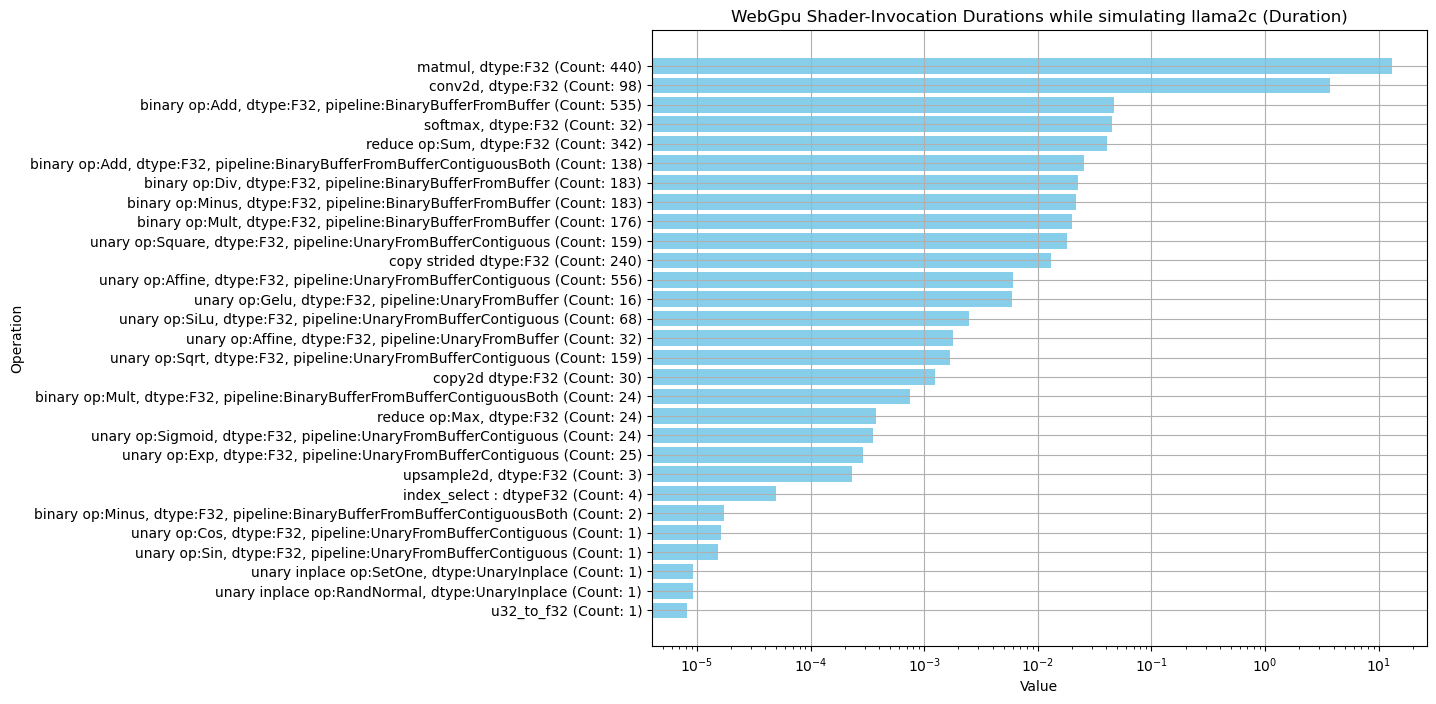

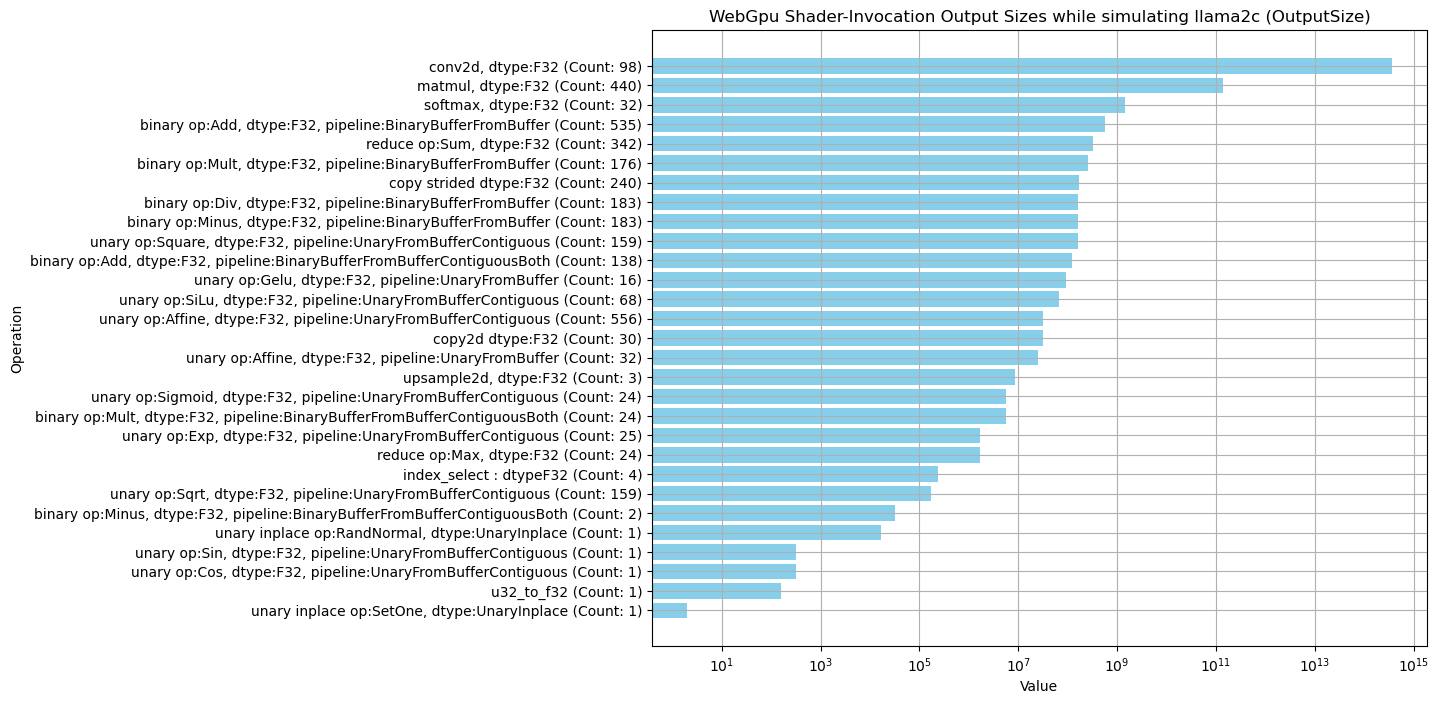

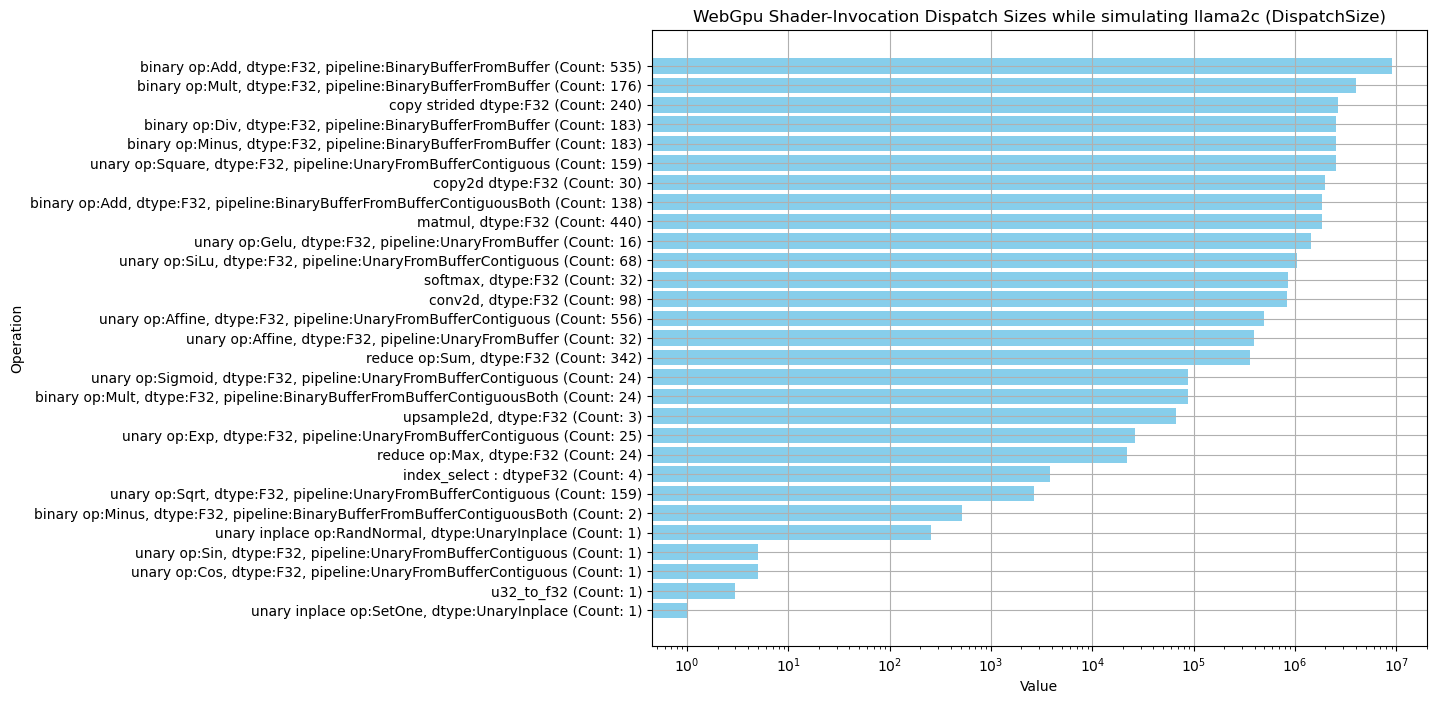

In [22]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
with open('candle-examples/wgpu_infostable_defusion_small.json', 'r') as file:
    data = json.load(file)

# Separate the data by measurement type
duration_data = [op for op in data if op['m_type'] == 'Duration']
output_size_data = [op for op in data if op['m_type'] == 'OutputSize']
dispatch_size_data = [op for op in data if op['m_type'] == 'DispatchSize']

# Function to process data for plotting
def process_data(data):
    for operation in data:
        operation['value'] = operation['count'] * operation['mean']
    
    sorted_operations = sorted(data, key=lambda x: x['value'], reverse=True)
    
    labels = [f"{op['label']} (Count: {op['count']})" for op in sorted_operations]
    values = [op['value'] for op in sorted_operations]
    total_sum = sum(values)
    
    # Print the operations along with their values
    print(f"Total sum for {data[0]['m_type']}: {total_sum}")
    print(f"Operations sorted by total {data[0]['m_type'].lower()} for {data[0]['m_type']}:")
    for operation in sorted_operations:
        print(f"Operation: {operation['label']}, {data[0]['m_type']}: {operation['value']}, Count: {operation['count']} Perc:{operation['value']/total_sum:.2%}")
    
    return labels, values

# Process data for each measurement type
duration_labels, duration_values = process_data(duration_data)
output_size_labels, output_size_values = process_data(output_size_data)
dispatch_size_labels, dispatch_size_values = process_data(dispatch_size_data)

# Function to plot data
def plot_data(labels, values, title):
    plt.figure(figsize=(10, 8))
    plt.barh(labels, values, color='skyblue')
    plt.grid()
    plt.xscale('log')
    plt.xlabel('Value')
    plt.ylabel('Operation')
    plt.title(title)
    plt.gca().invert_yaxis()  # To have the longest value at the top
    plt.show()

# Plot data for each measurement type
plot_data(duration_labels, duration_values, 'WebGpu Shader-Invocation Durations while simulating llama2c (Duration)')
plot_data(output_size_labels, output_size_values, 'WebGpu Shader-Invocation Output Sizes while simulating llama2c (OutputSize)')
plot_data(dispatch_size_labels, dispatch_size_values, 'WebGpu Shader-Invocation Dispatch Sizes while simulating llama2c (DispatchSize)')

In [19]:
import numpy as np

def matmul(global_id, op_matmul, v_input1, v_input2):
    x = global_id[0] * 4
    y = global_id[1] * 4
    batch = global_id[2]

    if x >= op_matmul[3]:
        return
    if y >= op_matmul[1]:
        return

    output_size_of_one_batch = op_matmul[1] * op_matmul[3]

    input1_offset = op_matmul[7]
    input2_offset = op_matmul[11]

    input1_stride_b = op_matmul[6]
    input1_stride_m = op_matmul[5]
    input1_stride_n = op_matmul[4]

    input2_stride_b = op_matmul[10]
    input2_stride_n = op_matmul[9]
    input2_stride_k = op_matmul[8]

    m_input1_offset = input1_offset + input1_stride_m * y + batch * input1_stride_b
    m_input2_offset = input2_offset + input2_stride_k * x + batch * input2_stride_b

    a = np.zeros((4, 4), dtype=np.float32)
    b = np.zeros((4, 4), dtype=np.float32)
    c = np.zeros((4, 4), dtype=np.float32)

    count = (op_matmul[2] + 3) // 4

    for t in range(count):
        # load tiles:
        for ix in range(4):
            ix2 = ix + t * 4
            for iy in range(4):
                iy2 = iy + t * 4
                a_x = input1_stride_n * ix2 + input1_stride_m * iy + m_input1_offset
                b_x = input2_stride_n * iy2 + input2_stride_k * ix + m_input2_offset

                if ix2 >= op_matmul[2] or y + iy >= op_matmul[1]:
                    a[iy][ix] = 0.0
                else:
                    a[iy][ix] = v_input1[a_x]

                if iy2 >= op_matmul[2] or x + ix >= op_matmul[3]:
                    b[iy][ix] = 0.0
                else:
                    b[iy][ix] = v_input2[b_x]

        # add to c
        c += np.dot(b, a)

    dest_offset = batch * output_size_of_one_batch + y * op_matmul[3] + x
    for ix in range(4):
        for iy in range(4):
            if ix + x < op_matmul[3] and iy + y < op_matmul[1]:
                v_dest[dest_offset + ix + iy * op_matmul[3]] = c[iy][ix]

# Define a mock setup for testing purposes
#op_matmul = [1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 0]  # Example values
#v_input1 = np.array([1.0, 2.0, 3.0, 4.0]) # Example input tensor 1
#v_input2 = np.array([1.0, 2.0, 3.0, 4.0])  # Example input tensor 2

op_matmul = [1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0]  # Example values
v_input1 = np.array([1.0, 2.0]) # Example input tensor 1
v_input2 = np.array([3.0, 4.0])  # Example input tensor 2


v_dest = np.zeros(4, dtype=np.float32)  # Example destination tensor
global_id = [0, 0, 0]  # Example global_id


# Run the function

for x in range(8):
    for y in range(8):
        matmul([x,y,0], op_matmul, v_input1, v_input2)

# Output result
print(v_dest.reshape((2,2)))

[[11.  0.]
 [ 0.  0.]]


In [22]:
import numpy as np

def workgroupBarrier():
    pass  # No operation needed for barrier in Python single-threaded context

# Workgroup shared memory (simulated)
Asub = np.zeros((16, 16), dtype=np.float32)
Bsub = np.zeros((16, 16), dtype=np.float32)

ZERO = 0.0
TS = 16

def matmul3(global_id, local_id, op_matmul, v_input1, v_input2, v_dest, counter):
    gx = global_id[0]
    gy = global_id[1]
    
    lx = local_id[0]
    ly = local_id[1]

    batch = global_id[2]

    output_size_of_one_batch = op_matmul[1] * op_matmul[3]

    input1_offset = op_matmul[7]
    input2_offset = op_matmul[11]

    input1_stride_b = op_matmul[6]
    input1_stride_m = op_matmul[5]
    input1_stride_k = op_matmul[4]

    input2_stride_b = op_matmul[10]
    input2_stride_n = op_matmul[8]
    input2_stride_k = op_matmul[9]

    m_input1_offset = input1_offset + input1_stride_m * gy + batch * input1_stride_b
    m_input2_offset = input2_offset + input2_stride_n * gx + batch * input2_stride_b

    numTiles = op_matmul[2] // 16  # may be 0, if k is smaller than 16

    acc = ZERO
    for t in range(0, op_matmul[2] , TS):
        tiledX = 16 * t + lx
        tiledY = 16 * t + ly

        
        if (tiledX < op_matmul[2] and gy < op_matmul[1]):
            Asub[lx, ly] = v_input1[m_input1_offset + tiledX * input1_stride_k]
        else:
            Asub[lx, ly] = 0
        if (tiledY < op_matmul[2] and gx < op_matmul[3]):
            Bsub[lx, ly] = v_input2[m_input2_offset + tiledY * input2_stride_k]
        else:
            Bsub[lx, ly] = 0

        
        if gx >= op_matmul[3]:
            return
        if gy >= op_matmul[1]:
            return

        


        if counter < TS * TS:
            return

        for k in range(16):
            acc += Asub[k, ly] * Bsub[lx, k]

    v_dest[batch * output_size_of_one_batch + gy * op_matmul[3] + gx] = acc



# Define a mock setup for testing purposes
#op_matmul = [1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 0]  # Example values
#v_input1 = np.array([1.0, 2.0, 3.0, 4.0]) # Example input tensor 1
#v_input2 = np.array([1.0, 2.0, 3.0, 4.0])  # Example input tensor 2

#op_matmul = [1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0]  # Example values
#v_input1 = np.array([1.0, 2.0]) # Example input tensor 1
#v_input2 = np.array([3.0, 4.0])  # Example input tensor 2

op_matmul = [1, 2, 3, 2, 1, 3, 1, 0, 1, 2, 1, 0]  # Example values
v_input1 = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0]) # Example input tensor 1
v_input2 = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0])  # Example input tensor 2

v_dest = np.zeros(4, dtype=np.float32)  # Example destination tensor
global_id = [0, 0, 0]  # Example global_id


# Run the function
counter = 0
for x in range(16):
    for y in range(16):
        matmul3([x,y,0],[x,y,0], op_matmul, v_input1, v_input2, v_dest, counter)
        counter += 1

for x2 in range(16):
    for y2 in range(16):
        matmul3([x2,y2,0],[x2,y2,0], op_matmul, v_input1, v_input2, v_dest, counter)
        counter += 1

# Output result
print(v_dest.reshape((2,2)))


[[16. 19.]
 [52. 64.]]
